# __Brough Lecture Notes: Monte Carlo Simulation & The Bootstrap__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: February 26, 2019 <br>
<br>

<br>

These notes are based on several sources: 

1. Teaching notes by Kevin Sheppard
2. The book _Computational Statistics_ by James Gentle
3. Others

<br>

## Overview of Monte Carlo Methods

<br>

__Monte Carlo:__ _Monte Carlo methods are experiments_. Monte Carlo experimentation is the use of simulated random numbers to estimate some functional of a probability distribution.

<br>

- Monte Carlo methods use random numbers, so to implement a Monte Carlo method it is necessary to have a source of random numbers.
- Typically, on a computer this is accomplished with _pseudorandom_ numbers: numbers that _appear to be_ random but are actually
  deterministic.
- Often, the objective is to simulate random sampling directly
- Often, it might be also be to estimate a specific quantity related to the distribution of a given sample.

<br>

We will often use Monte Carlo methods to simulate data from a hypothesized model

- _The Monte Carlo Test_ is a good example:
    * Estimate quantiles of a test statistic, $T$, under the null hypothesis
    * Simulate $m$ pseudorandom samples of the same size as the given sample under the null hypothesis
    * Compute the test statistic for each sample
    * This yields a sample of test statistics: $t_{1}^{\ast}, \ldots, t_{m}^{\ast}$
    * Use the ECDF, $P_{m}^{\ast}$ as an estimate of the CDF of the test statistic, $P_{T}$
    * The critical region for the test or the p-value of the observed test statistic can be estimated from $P_{m}^{\ast}$

<br>

We can also use the Monte Carlo method as a learning device to grapple with a new model. 

- An example is simulating the random walk process. 
- We do this in Python below

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

numObs = 252
y = np.cumsum(np.random.normal(size=252))
ts = pd.Series(y)


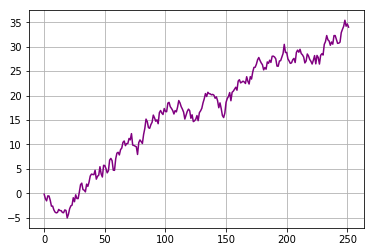

In [7]:
ts.plot(grid=True, color="purple")

<br>

With simulation we can _play_ with a model by tweaking parameters, changing the setup, etc. We can use it as a playground to develop intuition for the model.

<br>

<br>

As another example, consider investigating the effect of fat tails in our data. We will work with a simple AR(1) model just for simplicity.

- First we will simulate the model with a normal distribution. 
- Next we will simulate the model witha a Student-t distribution.

<br>

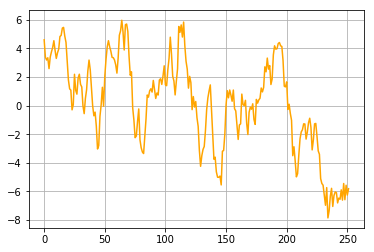

In [10]:
phi = 0.95

numObs = 252

u = np.random.normal(size=numObs)
initValue = np.log(100.0)
y1 = np.empty(numObs)
y1[0] = initValue

for t in range(1, numObs):
    y1[t] = phi * y1[t-1] + u[t]
    
ts1 = pd.Series(y1)
ts1.plot(grid=True, color="orange")


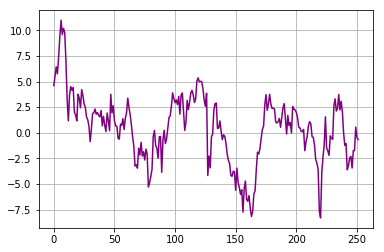

In [11]:
v = np.random.standard_t(df=5, size=numObs)
y2 = np.empty(numObs)
y2[0] = initValue

for t in range(1, numObs):
    y2[t] = phi * y2[t-1] + v[t]

ts2 = pd.Series(y2)
ts2.plot(grid=True, color="purple")

<br>

We can, of course, repeat this process as many times as we desire. We could, for example, use repititions of the above to compare the sampling distributions of an estimator for $\phi$ given the different generating distributions. We can take summary statistics, plot histograms, etc for comparison.

<br>

But perhaps, the most useful thing to do is to genate a predictive distribution via the Monte Carlo method for these two models. Predictive distributions feature prominantly in finance, but are rarely discussed outside of a Bayesian context. Below
we carry out such a study and plot the terminal values of the two models above over 10,000 repetitions. 

<br>

In [ ]:
def simulateAR1(phi = 0.05, numObs = 252, initValue = np.log(100.0)):
    u = np.random.normal(numObs)
    y = np.empty(numObs)
    y[0] = initValue
    
    for t in range(1, numObs):
        y[t] = phi * y[t-1]
    

## The Bootstrap